<a href="https://colab.research.google.com/github/brianellis1997/Music_Generation/blob/main/Popularity_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/brianellis1997/Music_Generation.git

Cloning into 'Music_Generation'...
remote: Enumerating objects: 186, done.
remote: Counting objects: 100% (186/186), done.
remote: Compressing objects: 100% (175/175), done.
remote: Total 186 (delta 92), reused 37 (delta 7), pack-reused 0
Receiving objects: 100% (186/186), 23.36 MiB | 11.62 MiB/s, done.
Resolving deltas: 100% (92/92), done.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
from matplotlib import pyplot as plt

In [4]:
df = pd.read_csv('/content/drive/MyDrive/DS340/spotify_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
df.head()

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
0,0.0594,1921,0.982,"['Sergei Rachmaninoff', 'James Levine', 'Berli...",0.279,831667,0.211,0,4BJqT0PrAfrxzMOxytFOIz,0.878000,10,0.665,-20.096,1,"Piano Concerto No. 3 in D Minor, Op. 30: III. ...",4,1921,0.0366,80.954
1,0.9630,1921,0.732,['Dennis Day'],0.819,180533,0.341,0,7xPhfUan2yNtyFG0cUWkt8,0.000000,7,0.160,-12.441,1,Clancy Lowered the Boom,5,1921,0.4150,60.936
2,0.0394,1921,0.961,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,0.328,500062,0.166,0,1o6I8BglA6ylDMrIELygv1,0.913000,3,0.101,-14.850,1,Gati Bali,5,1921,0.0339,110.339
3,0.1650,1921,0.967,['Frank Parker'],0.275,210000,0.309,0,3ftBPsC5vPBKxYSee08FDH,0.000028,5,0.381,-9.316,1,Danny Boy,3,1921,0.0354,100.109
4,0.2530,1921,0.957,['Phil Regan'],0.418,166693,0.193,0,4d6HGyGT8e121BsdKmw9v6,0.000002,3,0.229,-10.096,1,When Irish Eyes Are Smiling,2,1921,0.0380,101.665


# MIDI Feature Extractor

In [ ]:
from music21 import *

# Load MIDI file
midi_file_path = '/content/drive/MyDrive/DS340/Johann Sebastian Bach/Invention 1, BWV 772.mid'
midi_stream = converter.parse(midi_file_path)

In [ ]:
for event in midi_stream.flat:
  print(event)

RH: 
LH: 
<music21.clef.TrebleClef>
<music21.clef.BassClef>
<music21.tempo.MetronomeMark andantino Quarter=80>
<music21.tempo.MetronomeMark andantino Quarter=80>
G# major
G# major
<music21.meter.TimeSignature 4/4>
<music21.meter.TimeSignature 4/4>
<music21.note.Rest 16th>
<music21.note.Rest 2.25ql>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note G>
<music21.note.Note C>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note E>
<music21.note.Note B>
<music21.note.Note F>
<music21.note.Note D>
<music21.note.Note C>
<music21.note.Note E>
<music21.note.Note C>
<music21.note.Note D>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note C>
<music21.note.Rest 1.25ql>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note D>
<music21.note.Note G>
<music21.note

/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py:3553: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  exec(code_obj, self.user_global_ns, self.user_ns)


## Key Signiature

In [ ]:
def key_signature_extract(midi_stream):
  # Extract key signature
  key_signature = None
  for event in midi_stream.flat.getElementsByClass('KeySignature'):
      key_signature = event
      break

  if key_signature:
      return key_signature
  else:
      print("Key signature not found in the MIDI file.")

In [ ]:
bach_key = key_signature_extract(midi_stream)
bach_key

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


<music21.key.Key of G# major>

## Tempo

In [ ]:
# We can see there are multiple tempos throughout a piece
for event in midi_stream.flat:
    if 'MetronomeMark' in event.classes:
      print(event)

<music21.tempo.MetronomeMark andantino Quarter=80>
<music21.tempo.MetronomeMark andantino Quarter=80>


In [ ]:
def tempo_extract(midi_stream):
  # Extract tempo
  tempos = []
  tempo_value = 0
  for event in midi_stream.flatten():
      if 'MetronomeMark' in event.classes:
          tempos.append(int(event.number))

  if tempos is not None:
    num_tempos = len(tempos)
    for tempo in tempos:
      tempo_value += tempo
    return tempo_value/num_tempos

  else:
      print("Tempo information not found in the MIDI file.")

In [ ]:
bach_tempo = tempo_extract(midi_stream)
bach_tempo

80.0

## Duration (min)

In [ ]:
def duration_extract(midi_stream):
  # Get total duration of the piece
  quarter_lengths = midi_stream.duration.quarterLength
  tempo_value = tempo_extract(midi_stream)

  duration_min = quarter_lengths/tempo_value
  return duration_min

In [ ]:
bach_duration = duration_extract(midi_stream)
bach_duration

1.1

### Another Example

In [ ]:
# Load MIDI file
midi_file_path = '/content/drive/MyDrive/DS340/Johann Sebastian Bach/Invention 15.mid'
midi_stream = converter.parse(midi_file_path)

# Extract key signature
bach_key2 = key_signature_extract(midi_stream)
bach_tempo2 = tempo_extract(midi_stream)
bach_duration2 = duration_extract(midi_stream)

bach_key2, bach_tempo2, bach_duration2

(<music21.key.Key of g# minor>, 105.0, 0.8380952380952381)

In [ ]:
# installs and imports to convert MIDI into audio
!pip install pretty_midi
!wget https://www.dropbox.com/s/4x27l49kxcwamp5/GeneralUser_GS_1.471.zip
!unzip GeneralUser_GS_1.471.zip
!apt install -y fluidsynth
from pretty_midi import PrettyMIDI
from IPython.display import Audio
from scipy.io.wavfile import write
import librosa

In [ ]:
# render the example
!fluidsynth -ni GeneralUser\ GS\ 1.471/GeneralUser\ GS\ v1.471.sf2 "/content/drive/MyDrive/DS340/Johann Sebastian Bach/Invention 15.mid" -F example.wav -r 44100

# hear the example
x,sr=librosa.load('example.wav')
Audio(x,rate=sr)

## Mode

In [ ]:
# Load MIDI file
midi_file_path = '/content/drive/MyDrive/DS340/Johann Sebastian Bach/Air in D Major.mid'
midi_stream = converter.parse(midi_file_path)

# Extract key signature
bach_key2 = key_signature_extract(midi_stream)
bach_tempo2 = tempo_extract(midi_stream)
bach_duration2 = duration_extract(midi_stream)

bach_key2, bach_tempo2, bach_duration2

/usr/local/lib/python3.10/dist-packages/music21/stream/base.py:3694: Music21DeprecationWarning: .flat is deprecated.  Call .flatten() instead
  return self.iter().getElementsByClass(classFilterList)


(<music21.key.Key of D major>, 80.0, 3.6)

In [ ]:
for event in midi_stream.flatten():
  print(event)

RH: 
LH: 
<music21.clef.TrebleClef>
<music21.clef.BassClef>
<music21.tempo.MetronomeMark andantino Quarter=80>
<music21.tempo.MetronomeMark andantino Quarter=80>
D major
D major
<music21.meter.TimeSignature 4/4>
<music21.meter.TimeSignature 4/4>
<music21.chord.Chord D5 F#5>
<music21.note.Note D>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note C#>
<music21.note.Rest whole>
<music21.note.Note B>
<music21.note.Note B>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Rest quarter>
<music21.note.Rest 1.75ql>
<music21.note.Note G>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note G>
<music21.note.Note F#>
<music21.note.Rest 1/6ql>
<music21.chord.Chord B4 E5>
<music21.note.Rest half>
<music21.note.Note G#>
<music21.note.Note D>
<music21.note.Note C#>
<music21.note.Note G#>
<music21.note.Note D>
<music21.chord.Chord A4 C#5>
<music21.note.Note A>
<music21.note.Note A>
<music21.note.Note B>
<music21.note.Note G>
<music21.note.Note A>
<music21.note.Note G>
<m

In [ ]:
# Understand how many major and minor chords in piece

# Extract chords from the MIDI file
chords = midi_stream.chordify()

# Initialize counters for major and minor chords
major_chords_count = 0
minor_chords_count = 0

# Iterate through chords and count major and minor chords
for chord in chords.recurse().getElementsByClass('Chord'):
    if chord.isMajorTriad():
        major_chords_count += 1
    elif chord.isMinorTriad():
        minor_chords_count += 1

# Print the counts
print("Major chords count:", major_chords_count)
print("Minor chords count:", minor_chords_count)

Major chords count: 16
Minor chords count: 5


In [ ]:
def mode_extract(midi_stream):
  # key_val = 0
  major_chords_count = 0
  minor_chords_count = 0

  # key = key_signature_extract(midi_stream)
  # if str(key).contains('major'):
  #   key_val = 1

  for chord in chords.recurse().getElementsByClass('Chord'):
    if chord.isMajorTriad():
        major_chords_count += 1
    elif chord.isMinorTriad():
        minor_chords_count += 1

  # Catch division by zero
  if major_chords_count > 0:
    if minor_chords_count == 0:
      mode = 1
      return mode
    else:
      mode = major_chords_count/(major_chords_count+minor_chords_count)
    return mode
  return 0

In [ ]:
bach_mode = mode_extract(midi_stream)
bach_mode

0.7619047619047619

# EDA

In [ ]:
df.describe(include='all')

,valence,year,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo
count,170653.000000,170653.000000,170653.000000,170653,170653.000000,1.706530e+05,170653.000000,170653.000000,170653,170653.000000,170653.000000,170653.000000,170653.000000,170653.000000,170653,170653.000000,170653,170653.000000,170653.000000
unique,NaN,NaN,NaN,34088,NaN,NaN,NaN,NaN,170653,NaN,NaN,NaN,NaN,NaN,133638,NaN,11244,NaN,NaN
top,NaN,NaN,NaN,['Эрнест Хемингуэй'],NaN,NaN,NaN,NaN,4BJqT0PrAfrxzMOxytFOIz,NaN,NaN,NaN,NaN,NaN,White Christmas,NaN,1945,NaN,NaN
freq,NaN,NaN,NaN,1211,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,73,NaN,1446,NaN,NaN
mean,0.528587,1976.787241,0.502115,NaN,0.537396,2.309483e+05,0.482389,0.084575,NaN,0.167010,5.199844,0.205839,-11.467990,0.706902,NaN,31.431794,NaN,0.098393,116.861590
std,0.263171,25.917853,0.376032,NaN,0.176138,1.261184e+05,0.267646,0.278249,NaN,0.313475,3.515094,0.174805,5.697943,0.455184,NaN,21.826615,NaN,0.162740,30.708533
min,0.000000,1921.000000,0.000000,NaN,0.000000,5.108000e+03,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-60.000000,0.000000,NaN,0.000000,NaN,0.000000,0.000000
25%,0.317000,1956.000000,0.102000,NaN,0.415000,1.698270e+05,0.255000,0.000000,NaN,0.000000,2.000000,0.098800,-14.615000,0.000000,NaN,11.000000,NaN,0.034900,93.421000
50%,0.540000,1977.000000,0.516000,NaN,0.548000,2.074670e+05,0.471000,0.000000,NaN,0.000216,5.000000,0.136000,-10.580000,1.000000,NaN,33.000000,NaN,0.045000,114.729000
75%,0.747000,1999.000000,0.893000,NaN,0.668000,2.624000e+05,0.703000,0.000000,NaN,0.102000,8.000000,0.261000,-7.183000,1.000000,NaN,48.000000,NaN,0.075600,135.537000


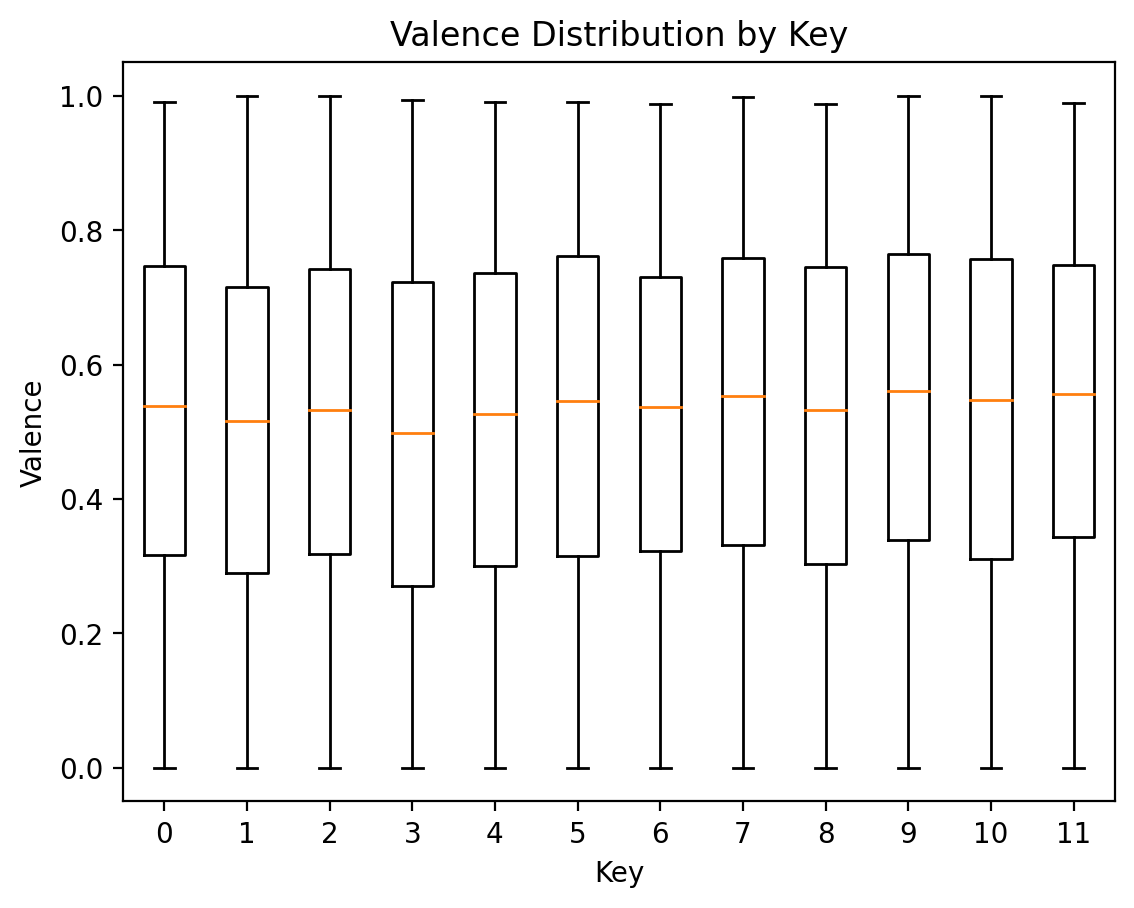

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have a DataFrame df with columns 'key' and 'valence'

# Create a list of valence values for each key category
valence_by_key = [df[df['key'] == key]['valence'] for key in range(12)]

# Create a box plot
plt.boxplot(valence_by_key)
plt.xlabel('Key')
plt.ylabel('Valence')
plt.title('Valence Distribution by Key')
plt.xticks(range(1, 13), range(12))  # Assuming 'key' ranges from 0 to 11
plt.show()


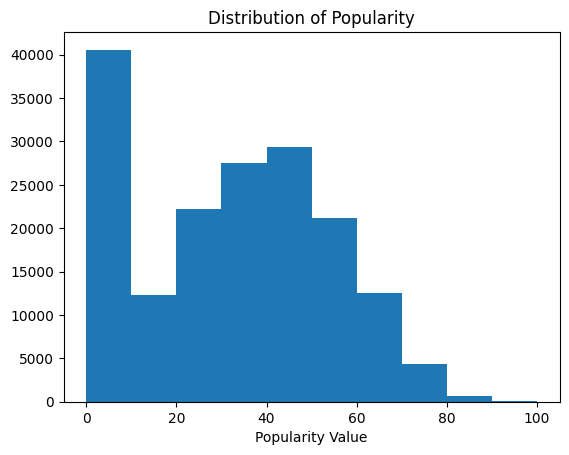

In [ ]:
plt.hist(df['popularity'])
plt.title('Distribution of Popularity')
plt.xlabel('Popularity Value')
plt.show()

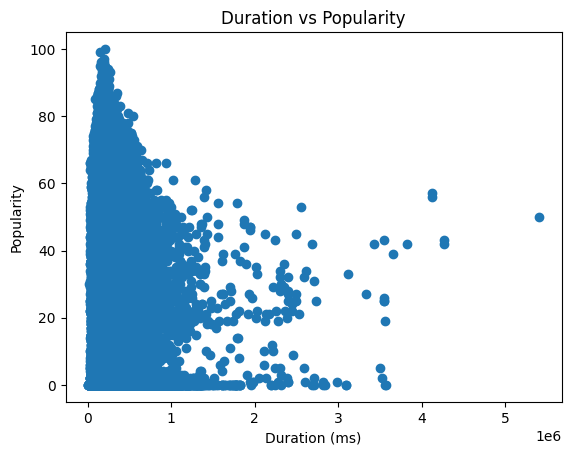

In [ ]:
plt.scatter(x=df['duration_ms'], y=df['popularity'])
plt.xlabel('Duration (ms)')
plt.ylabel('Popularity')
plt.title('Duration vs Popularity')
plt.show()

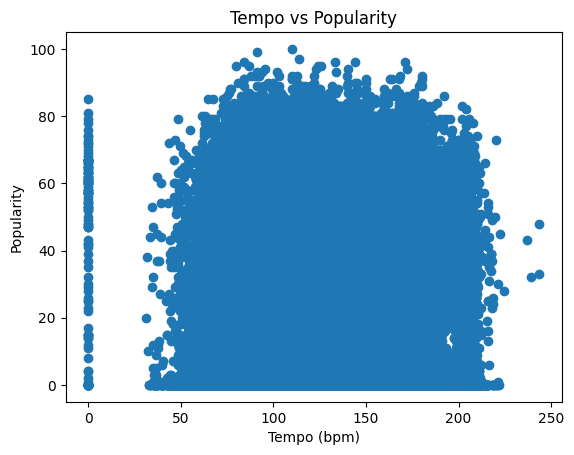

In [ ]:
plt.scatter(x=df['tempo'], y=df['popularity'])
plt.xlabel('Tempo (bpm)')
plt.ylabel('Popularity')
plt.title('Tempo vs Popularity')
plt.show()

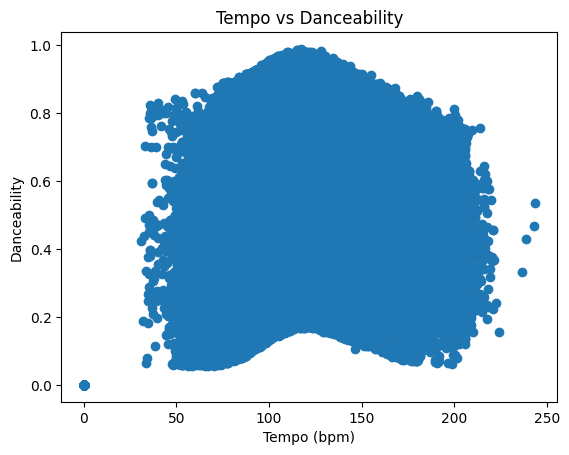

In [ ]:
plt.scatter(x=df['tempo'], y=df['danceability'])
plt.xlabel('Tempo (bpm)')
plt.ylabel('Danceability')
plt.title('Tempo vs Danceability')
plt.show()

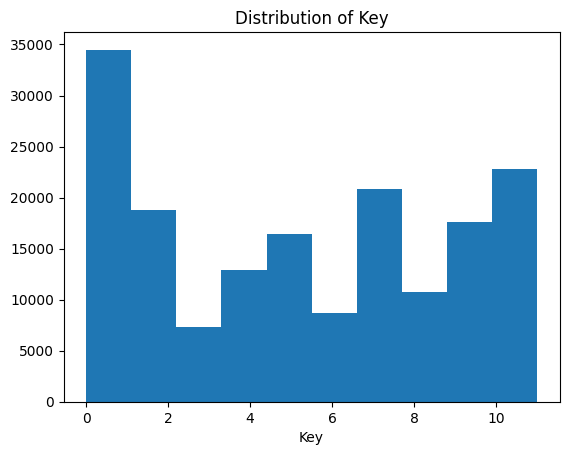

In [ ]:
plt.hist(df['key'])
plt.title('Distribution of Key')
plt.xlabel('Key')
plt.show()

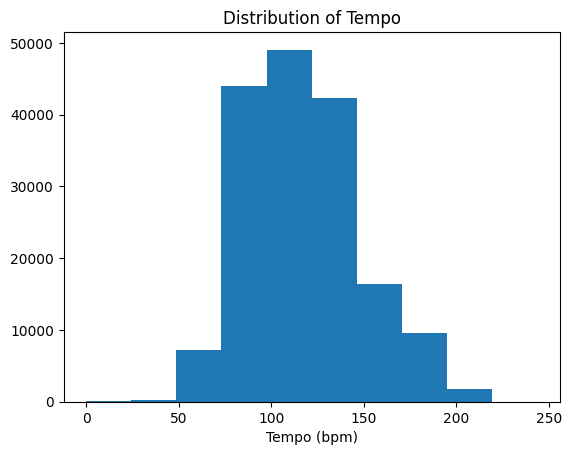

In [ ]:
plt.hist(df['tempo'])
plt.title('Distribution of Tempo')
plt.xlabel('Tempo (bpm)')
plt.show()

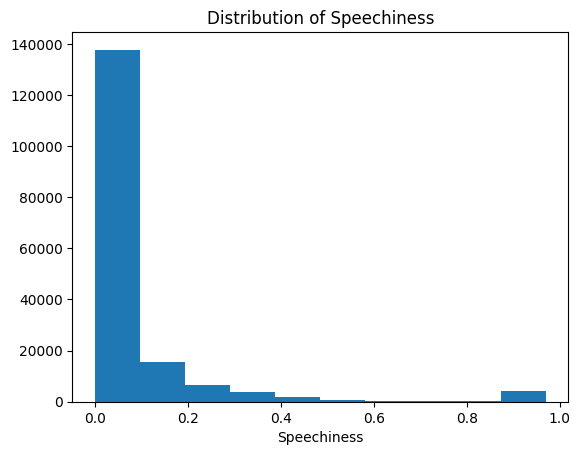

In [ ]:
plt.hist(df['speechiness'])
plt.title('Distribution of Speechiness')
plt.xlabel('Speechiness')
plt.show()

In [ ]:
df['mode'].value_counts()

1    120635
0     50018
Name: mode, dtype: int64

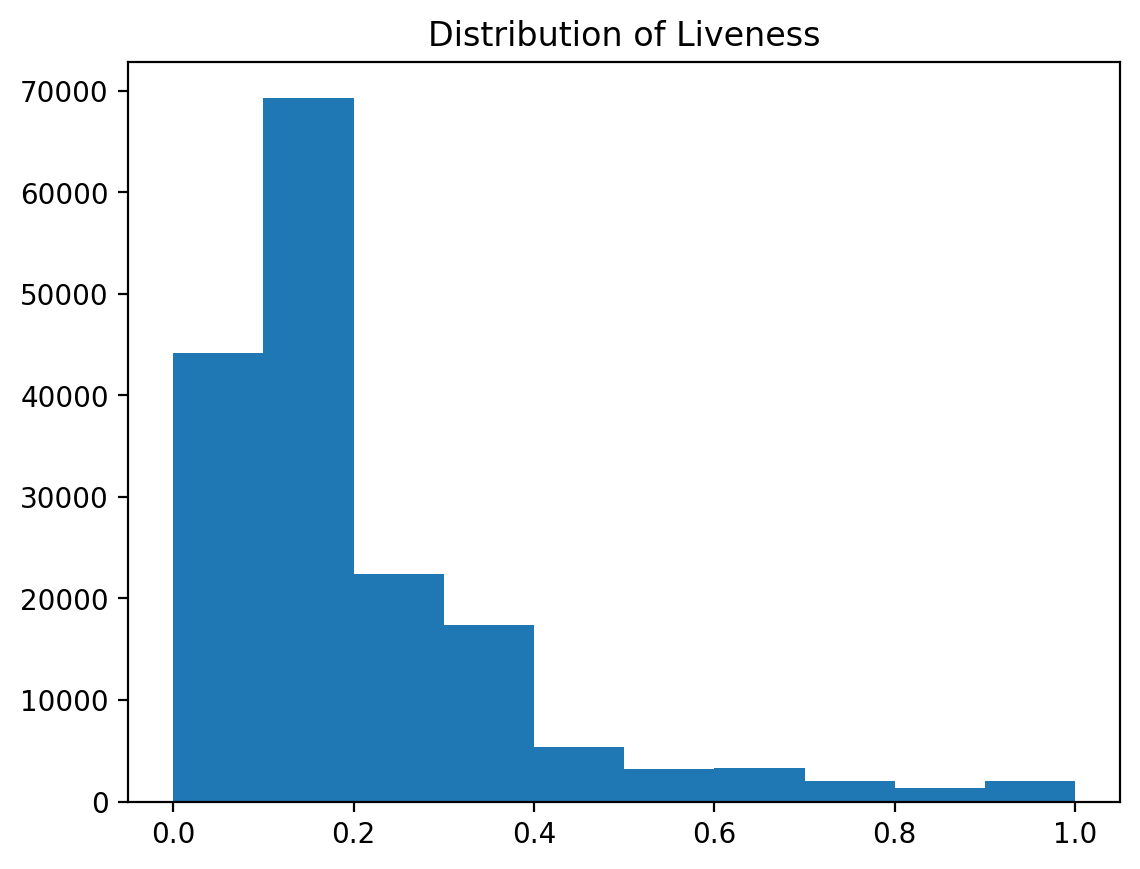

In [ ]:
# Liveness
plt.hist(df['liveness'])
plt.title('Distribution of Liveness')
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [ ]:
df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'energy', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

X = df2.drop('danceability', axis=1)
y = df['danceability']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((136522, 5), (34131, 5))

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_pred, y_test)

print(np.sqrt(mse))

0.14297840157216396


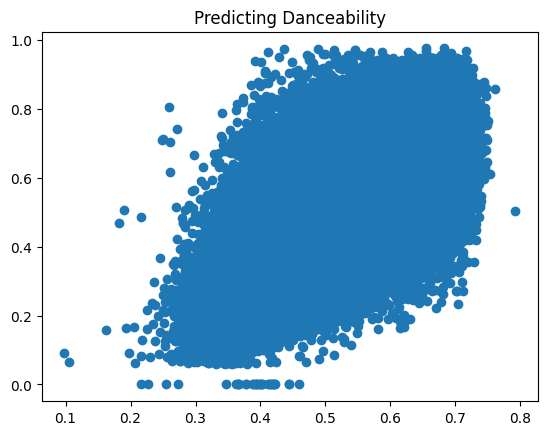

In [ ]:
plt.scatter(y_pred, y_test)
plt.title('Predicting Danceability')
plt.show()

In [ ]:
df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'danceability', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

X = df2.drop('energy', axis=1)
y = df['energy']

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((136522, 5), (34131, 5))

In [ ]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np

y_pred = lr.predict(X_test)

mse = mean_squared_error(y_pred, y_test)

print(np.sqrt(mse))

0.1612730609001531


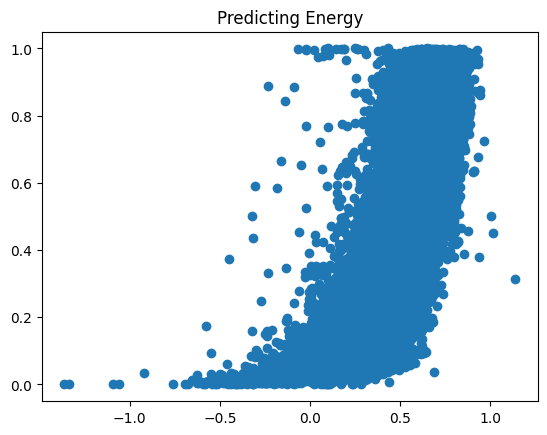

In [ ]:
plt.scatter(y_pred, y_test)
plt.title('Predicting Energy')
plt.show()

A polynomial model might work better here.

Root Mean Squared Error: 0.14664460408301241


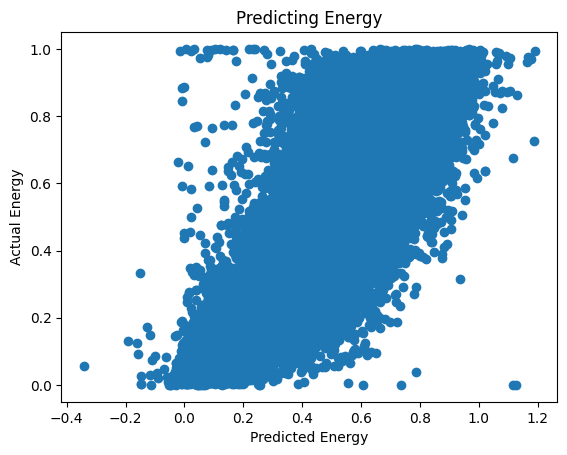

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# # Drop unnecessary columns
# df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'danceability', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'mode', 'release_date', 'speechiness'])

# # Split data into features (X) and target variable (y)
# X = df2.drop('energy', axis=1)
# y = df['energy']

# # Split data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize StandardScaler
# sc = StandardScaler()

# # Fit and transform training data, transform testing data
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# Transform features into polynomial features of degree 2
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize LinearRegression model
lr = LinearRegression()

# Fit the polynomial features to the model
lr.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test_poly)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print root mean squared error
print("Root Mean Squared Error:", np.sqrt(mse))

# Plot predicted vs. actual energy values
plt.scatter(y_pred, y_test)
plt.title('Predicting Energy')
plt.xlabel('Predicted Energy')
plt.ylabel('Actual Energy')
plt.show()

Root Mean Squared Error: 0.14435144660062713


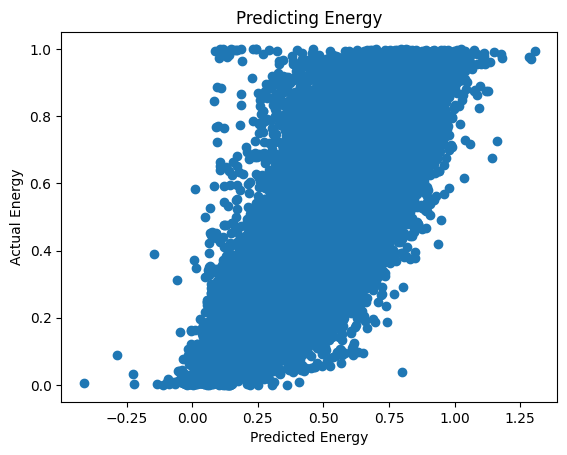

In [ ]:
# Transform features into polynomial features of degree 3
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Initialize LinearRegression model
lr = LinearRegression()

# Fit the polynomial features to the model
lr.fit(X_train_poly, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test_poly)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print root mean squared error
print("Root Mean Squared Error:", np.sqrt(mse))

# Plot predicted vs. actual energy values
plt.scatter(y_pred, y_test)
plt.title('Predicting Energy')
plt.xlabel('Predicted Energy')
plt.ylabel('Actual Energy')
plt.show()

We see that a polynomial value of 2 fits energy the best.

### Valence

Root Mean Squared Error: 0.2035714924595121


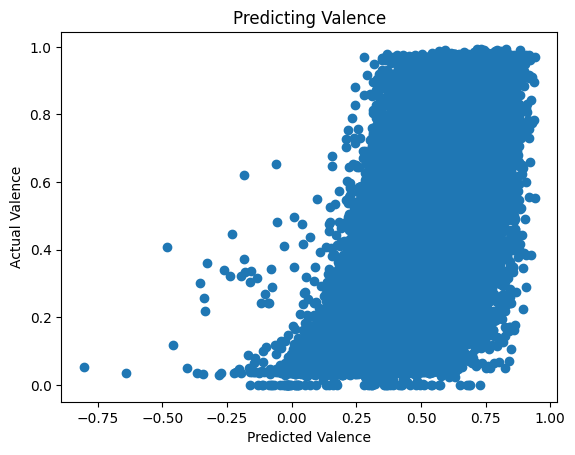

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
import matplotlib.pyplot as plt

# Drop unnecessary columns
df2 = df.drop(columns=['year', 'acousticness', 'artists', 'popularity', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'release_date', 'speechiness'])

# Split data into features (X) and target variable (y)
X = df2.drop('valence', axis=1)
y = df['valence']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize StandardScaler
sc = StandardScaler()

# Fit and transform training data, transform testing data
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize LinearRegression model
lr = LinearRegression()

# Fit the polynomial features to the model
lr.fit(X_train, y_train)

# Predict on the testing set
y_pred = lr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)

# Print root mean squared error
print("Root Mean Squared Error:", np.sqrt(mse))

# Plot predicted vs. actual energy values
plt.scatter(y_pred, y_test)
plt.title('Predicting Valence')
plt.xlabel('Predicted Valence')
plt.ylabel('Actual Valence')
plt.show()

In [ ]:
import numpy as np
import statsmodels.api as sm

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_names = X_train.columns

# Initialize and apply StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Convert scaled arrays back into pandas DataFrames with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=column_names, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=column_names, index=X_test.index)

# Add constant for intercept term
X_train_sm = sm.add_constant(X_train_scaled_df)
X_test_sm = sm.add_constant(X_test_scaled_df)

# Fit the OLS model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print the summary with variable names
print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                valence   R-squared:                       0.401
Model:                            OLS   Adj. R-squared:                  0.401
Method:                 Least Squares   F-statistic:                 1.304e+04
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:24:07   Log-Likelihood:                 23464.
No. Observations:              136522   AIC:                        -4.691e+04
Df Residuals:                  136514   BIC:                        -4.683e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.5287      0.001    958.693   

### Popularity

In [ ]:
# Drop unnecessary columns
df2 = df.drop(columns=['year', 'acousticness', 'artists', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'release_date', 'speechiness'])

# Split data into features (X) and target variable (y)
X = df2.drop('popularity', axis=1)
y = df['popularity']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

column_names = X_train.columns

# Initialize and apply StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

# Convert scaled arrays back into pandas DataFrames with column names
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=column_names, index=X_train.index)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=column_names, index=X_test.index)

# Add constant for intercept term
X_train_sm = sm.add_constant(X_train_scaled_df)
X_test_sm = sm.add_constant(X_test_scaled_df)

# Fit the OLS model
model = sm.OLS(y_train, X_train_sm)
results = model.fit()

# Print the summary with variable names
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.322
Model:                            OLS   Adj. R-squared:                  0.322
Method:                 Least Squares   F-statistic:                     8104.
Date:                Sat, 23 Mar 2024   Prob (F-statistic):               0.00
Time:                        19:25:13   Log-Likelihood:            -5.8803e+05
No. Observations:              136522   AIC:                         1.176e+06
Df Residuals:                  136513   BIC:                         1.176e+06
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           31.4388      0.049    646.684   

Looking at the t-statistics, `valence`, `energy`, and `danceability` are the most significant variables.

After doing this preliminary modeling among the features we can't engineer, it seems like `danceability` and `energy` are good candidates for imputation through additional models. `Mode` can be calculated simply by using the major/minor key of the piece along with the overall prevelance of major vs minor chords (ex. 50 bars of major chords vs 10 bars of minor chords would score high in valence)<br>Other non-feature engineerable variables such as `liveness` we will have to drop which is fine as it doesn't contain much variance in its distribution.

# Data Preprocessing

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170653 entries, 0 to 170652
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   valence           170653 non-null  float64
 1   year              170653 non-null  int64  
 2   acousticness      170653 non-null  float64
 3   artists           170653 non-null  object 
 4   danceability      170653 non-null  float64
 5   duration_ms       170653 non-null  int64  
 6   energy            170653 non-null  float64
 7   explicit          170653 non-null  int64  
 8   id                170653 non-null  object 
 9   instrumentalness  170653 non-null  float64
 10  key               170653 non-null  int64  
 11  liveness          170653 non-null  float64
 12  loudness          170653 non-null  float64
 13  mode              170653 non-null  int64  
 14  name              170653 non-null  object 
 15  popularity        170653 non-null  int64  
 16  release_date      17

In [5]:
# Remove unnecessary columns
X = df.drop(columns=['year', 'acousticness', 'artists', 'explicit', 'id', 'instrumentalness', 'liveness', 'name', 'release_date', 'speechiness', 'popularity'])
y = df['popularity']

In [6]:
# Splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [7]:
# Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [8]:
X_train_scaled.shape, X_test_scaled.shape

((136522, 8), (34131, 8))

# Modeling

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train_scaled, y_train)

RandomForestRegressor()

In [ ]:
# Predict on the test set
y_pred_baseline = rf.predict(X_test_scaled)

# Calculate RMSE and R2 for the baseline model
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"Baseline RMSE: {rmse_baseline:.2f}")
print(f"Baseline R2: {r2_baseline:.2f}")

Baseline RMSE: 15.90
Baseline R2: 0.47


## Artificial Neural Network (ANN)
We will implement a ANN with two hidden layers and utilize the swish and relu activation functions along with some dropout regularization.

In [9]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [14]:
model = Sequential([
    Dense(256, activation='swish', input_shape=(X_train.shape[1],)),
    Dropout(0.4),
    Dense(128, activation='swish', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1)  # Output layer for regression; no activation function
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [15]:
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
3414/3414 [==============================] - 14s 4ms/step - loss: 317.8004 - mean_squared_error: 317.8004 - mean_absolute_error: 14.0963 - val_loss: 274.4798 - val_mean_squared_error: 274.4798 - val_mean_absolute_error: 13.1689
Epoch 2/100
3414/3414 [==============================] - 12s 4ms/step - loss: 281.8569 - mean_squared_error: 281.8569 - mean_absolute_error: 13.3856 - val_loss: 270.0283 - val_mean_squared_error: 270.0283 - val_mean_absolute_error: 13.0835
Epoch 3/100
3414/3414 [==============================] - 12s 4ms/step - loss: 278.5670 - mean_squared_error: 278.5670 - mean_absolute_error: 13.2899 - val_loss: 266.3301 - val_mean_squared_error: 266.3301 - val_mean_absolute_error: 13.0244
Epoch 4/100
3414/3414 [==============================] - 12s 4ms/step - loss: 276.1781 - mean_squared_error: 276.1781 - mean_absolute_error: 13.2257 - val_loss: 266.1433 - val_mean_squared_error: 266.1433 - val_mean_absolute_error: 13.0195
Epoch 5/100
3414/3414 [=================

In [16]:
test_loss, test_mse, test_mae = model.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Test MSE: {test_mse:.3f}, Test MAE: {test_mae:.3f}")

1067/1067 - 2s - loss: 256.4274 - mean_squared_error: 256.4274 - mean_absolute_error: 12.6757 - 2s/epoch - 2ms/step
Test MSE: 256.427, Test MAE: 12.676


In [18]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled).flatten()

# Calculate RMSE and R2 Score
rmse_ann = np.sqrt(mean_squared_error(y_test, y_pred))
r2_ann = r2_score(y_test, y_pred)

print(f"ANN RMSE: {rmse_ann:.2f}")
print(f"ANN R2: {r2_ann:.2f}")

1067/1067 [==============================] - 2s 2ms/step
ANN RMSE: 16.01
ANN R2: 0.46


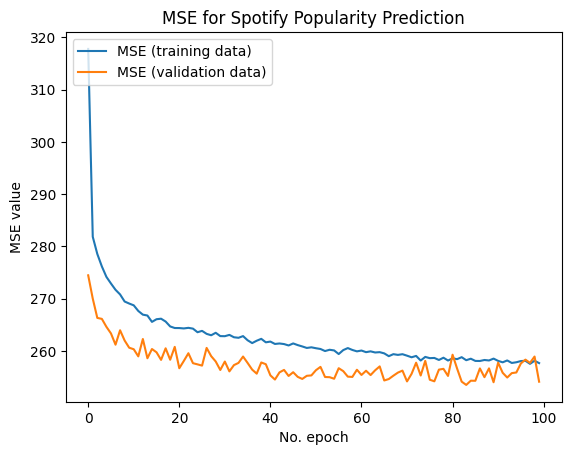

In [19]:
plt.plot(history.history['mean_squared_error'], label='MSE (training data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation data)')
plt.title('MSE for Spotify Popularity Prediction')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

We see no great improvement over our Random Forest model.

## XGBoost

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [ ]:
xgb = XGBRegressor()
xgb.fit(X_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = xgb.predict(X_test_scaled)

In [ ]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

RMSE: 15.99
R2: 0.46


Our XGboost model obtains an RMSE of 15.99 and R-squared of 46% which is a great improvement over our baseline linear regression model in the Extraction_Demo notebook. Let's see if we can tune for the best hyperparameters.

In [ ]:
# define hyperparameter space
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4],
    'gamma': [0, 0.1, 0.2, 0.3, 0.4],
    'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.6, 0.7, 0.8, 0.9, 1.0],
}

In [ ]:
# Initialize the XGBRegressor
xgb = XGBRegressor()

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(xgb, param_distributions=param_dist,
                                   n_iter=25, scoring='neg_mean_squared_error',
                                   n_jobs=-1, cv=5, verbose=3, random_state=22)

# Fit RandomizedSearchCV
random_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          random_state=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.7, 0.8, 0.9,
                                                             1.0],
                                        'gamma': [0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.01, 0.05, 0.1, 0.2],
                                        'max_depth': [3, 4, 5, 6, 7],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500],
                                        'subsample': [0.6, 0.7, 0.8, 0.9, 1.0]},
                   random_state=22, scoring='neg_mean_squared_error',
                   verbose=3)

In [ ]:
# Evaluate best model
best_model = random_search.best_estimator_

# Making predictions with the best model
y_pred = best_model.predict(X_test_scaled)

# Calculate RMSE and R2 for the best model
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred))
r2_best = r2_score(y_test, y_pred)

print(f"Best RMSE: {rmse_best:.2f}")
print(f"Best R2: {r2_best:.2f}")

Best RMSE: 15.83
Best R2: 0.47


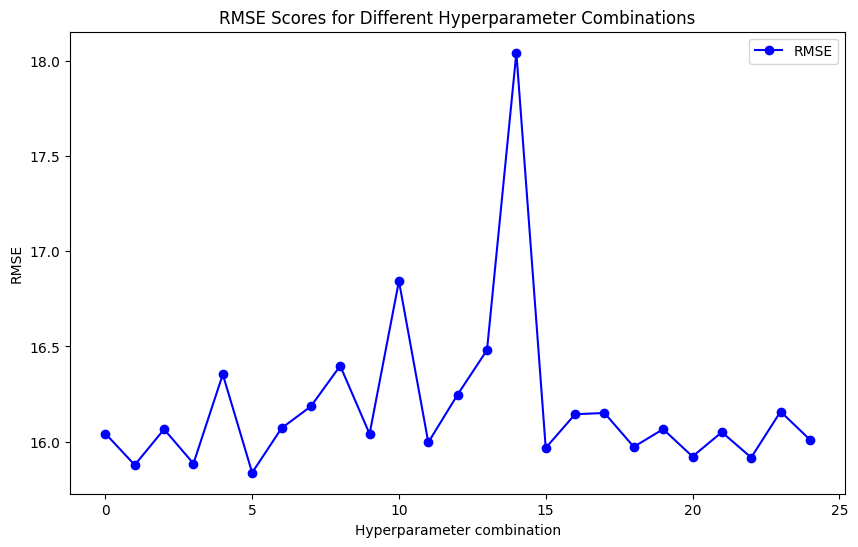

In [ ]:
# Plot
import matplotlib.pyplot as plt

# Extract the mean test scores (neg_mean_squared_error) and convert to RMSE
mean_test_scores = np.sqrt(-random_search.cv_results_['mean_test_score'])

# Plotting RMSE scores from Random Search
plt.figure(figsize=(10, 6))
plt.plot(range(len(mean_test_scores)), mean_test_scores, marker='o', color='b', label='RMSE')
plt.title('RMSE Scores for Different Hyperparameter Combinations')
plt.xlabel('Hyperparameter combination')
plt.ylabel('RMSE')
plt.legend()
plt.show()

As we can see, our XGBoost model hovers around the 15 rmse limit and doesn't improve much.